In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time
import os

#텍스트 데이터 전처리하기
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

# 데이터 읽기
df = pd.read_csv("C:/Users/USER/Desktop/DSP_python/DataAnalysis/text_crawling.csv")

# 모든 데이터에 전처리 적용하기
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,신한카드 플리,신한카드,관련 문서 신한카드카드상품 신한카드 플리전 가맹점 혜택은 기본 내 취향 ...
1,타블로 디스전,힙합 디스전,개요 사건의 경과 발단 최자의 스나이퍼 디스 스컬의 맞디스 스나이퍼의 맞디스 ...
2,아베 신조비판과 논란,아베 신조,상위 문서 아베 신조아베 신조관련 문서아베 신조관련 문서 펼치기 접기 생애 ...
3,등장인물,,상위 문서 개요 단테 베르길리우스 운전수 수감자 이상 파우스트 돈키호테 ...
4,틀맨체스터 시티 간략,잉글랜드의 축구클럽틀,맨체스터 시티 시즌 스쿼드맨체스터 시티 시즌 스쿼드 워커 후벵 필립스 ...


In [2]:
# 말 뭉치 만들기
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_text_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

신한카드 플리 타블로   디스전 아베 신조비판과 논란  등장인물 틀맨체스터 시티 간략 쿠로다 류헤이 브리스톨 시티  황의조 용기병스타크래프트 시리즈  이준석 히시 아마존우마무스메 프리티 더비인게임 정보  암살 마고 그룹 도레미 마켓간식 타임년 조두현 하라 다카시 어서와 한국은 처음이지 아베 신조생애 파일미하라 오사무 헹가래  커스터드맛 쿠키   미션   이상한 변호사 우영우등장인물 여성향 게임의 히로인으로 최강 서바이벌 루즌아 신병장삐쭈등장인물 나카자키 쇼타 파일나카자키 쇼타 군인아들사랑카페 쿄에이 보우건 원에스더 다카하시 고레키요 올타임 탑  앨범 폴스타  게임 시나리오 라이터 혹등고래 딘플레이어 사이토 마코토 도레미 마켓간식 타임년 메이플스토리월드 러스티 스미스 뇨롱이 야마구치현 제구 점박이 한반도의 공룡  아베 신조 피격 사건   모드     소령헬싱  제육볶음 타쿠미 슈 라시드 앗 딘 시난나 혼자 소드 마스터       박정원 수면무호흡증 아베 신조 피격 사건반응 소티 영암 연쇄살인 사건 다카하시 고레키요 뮤직뱅크차트년 월 이후 프로미스나인수상 패북 고대 그리스  리온 레이몬드작중 행적 티티체리 커스터드맛 쿠키 쿠키런 킹덤건물꾸미기 미즈 마블드라마 도시  세계관 박성영  최준희 우영우 뇨롱이 불로불사 치안국가별 현황아시아동아시아 웨이브 랭글러 도림고등학교  루키우스 코르넬리우스 술라 금마리 정병욱일기 시리즈     주차  샤오미 스마트 밴드 시리즈 미호강 티페르 캠페인 소티스 가면라이더 데스트림 배치기가수 김수환  타이거즈년월 사토 게이 야마구치현 틀키르기스스탄의 세계유산 러스티 스미스 


In [3]:
'''konlpy를 이용해 키워드 추출하기'''
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_text_corpus)
count = Counter(nouns)
print(count)

Counter({'우스': 17397, '년': 6255, '번': 2910, '문단': 2644, '기원전': 2611, '문서': 2580, '것': 2500, '이전': 2391, '판': 2355, '역사': 2315, '사건': 2095, '보결': 1832, '맛': 1811, '루스': 1744, '마르쿠스': 1743, '수': 1563, '월': 1438, '리': 1433, '키': 1428, '스': 1397, '라비': 1385, '루키': 1379, '이': 1336, '아우구스투스': 1236, '일': 1226, '그': 1199, '쿠키': 1105, '티': 1088, '살인': 1087, '때': 960, '카이사르': 941, '말': 908, '강': 859, '중': 823, '의': 822, '등': 817, '때문': 798, '코르': 789, '발레리': 752, '쿠스': 738, '티투스': 731, '넬리': 728, '아누': 696, '이후': 692, '리누스': 668, '퀸투스': 666, '푸블': 662, '위': 644, '누스': 642, '사람': 617, '자신': 593, '경우': 562, '시': 560, '정도': 557, '아베': 539, '율리우스': 536, '나이': 535, '년년': 535, '더': 533, '임페라토르': 528, '비': 514, '전': 509, '세르': 504, '부분': 502, '일본': 486, '대한': 461, '사항': 460, '아이': 460, '다른': 450, '회': 440, '모습': 440, '파': 438, '서버': 431, '토론': 430, '후': 430, '클라우디우스': 429, '투스': 425, '합의': 424, '프로': 422, '내용': 416, '위해': 416, '드라군': 416, '를': 415, '코인': 398, '방송': 395, '수스': 393, '누': 392, '점': 391, '

In [4]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'우스': 17397, '문단': 2644, '기원전': 2611, '문서': 2580, '이전': 2391, '역사': 2315, '사건': 2095, '보결': 1832, '루스': 1744, '마르쿠스': 1743, '라비': 1385, '루키': 1379, '아우구스투스': 1236, '쿠키': 1105, '살인': 1087, '카이사르': 941, '때문': 798, '코르': 789, '발레리': 752, '쿠스': 738, '티투스': 731, '넬리': 728, '아누': 696, '이후': 692, '리누스': 668, '퀸투스': 666, '푸블': 662, '누스': 642, '사람': 617, '자신': 593, '경우': 562, '정도': 557, '아베': 539, '율리우스': 536, '나이': 535, '년년': 535, '임페라토르': 528, '세르': 504, '부분': 502, '일본': 486, '대한': 461, '사항': 460, '아이': 460, '다른': 450, '모습': 440, '서버': 431, '토론': 430, '클라우디우스': 429, '투스': 425, '합의': 424, '프로': 422, '내용': 416, '위해': 416, '드라군': 416, '코인': 398, '방송': 395, '수스': 393, '사실': 391, '한국': 389, '시즌': 388, '카이': 381, '게임': 371, '점수': 369, '아우렐리우스': 369, '리그': 365, '푸리': 365, '등장': 360, '밀리': 356, '년년년년년': 356, '월드': 354, '비누': 349, '파비': 344, '막시무스': 341, '사용': 337, '공격': 336, '술라': 336, '시간': 334, '하나': 332, '당시': 326, '부스': 326, '미우스': 326, '도시': 325, '생각': 316, '이상': 313, '문제': 313, '인물': 3

In [5]:
'''불용어 제거'''
# 한국어 약식 불용어사전 예시 파일입니다.출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "C:/Users/USER/DataAnalysis_jupyter/korean_stopwords.txt"

#텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding = 'utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [6]:
#나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                      '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물',
                      '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [7]:
#키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'우스': 17397, '문단': 2644, '기원전': 2611, '이전': 2391, '역사': 2315, '사건': 2095, '보결': 1832, '루스': 1744, '마르쿠스': 1743, '라비': 1385, '루키': 1379, '아우구스투스': 1236, '쿠키': 1105, '살인': 1087, '카이사르': 941, '코르': 789, '발레리': 752, '쿠스': 738, '티투스': 731, '넬리': 728, '아누': 696, '리누스': 668, '퀸투스': 666, '푸블': 662, '누스': 642, '사람': 617, '아베': 539, '율리우스': 536, '나이': 535, '년년': 535, '임페라토르': 528, '세르': 504, '부분': 502, '일본': 486, '대한': 461, '사항': 460, '서버': 431, '토론': 430, '클라우디우스': 429, '투스': 425, '합의': 424, '프로': 422, '위해': 416, '드라군': 416, '코인': 398, '방송': 395, '수스': 393, '한국': 389, '시즌': 388, '카이': 381, '게임': 371, '점수': 369, '아우렐리우스': 369, '리그': 365, '푸리': 365, '등장': 360, '밀리': 356, '년년년년년': 356, '월드': 354, '비누': 349, '파비': 344, '막시무스': 341, '공격': 336, '술라': 336, '당시': 326, '부스': 326, '미우스': 326, '도시': 325, '문제': 313, '유닛': 305, '총리': 299, '내각': 296, '다시': 295, '경기': 294, '암살': 288, '스루': 285, '시작': 278, '본인': 265, '무스': 265, '존재': 262, '티베리우스': 254, '언급': 250, '이유': 249, '유니': 249, '유저': 248, '관련':

In [8]:
#pytagcloud 사용하기

import random
import pytagcloud
import webbrowser

#가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags =remove_char_counter.most_common(40)

#pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)

#pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size = (900, 600), fontname = 'NanumGothic', rectangular = False)

pygame 2.1.2 (SDL 2.0.18, Python 3.8.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


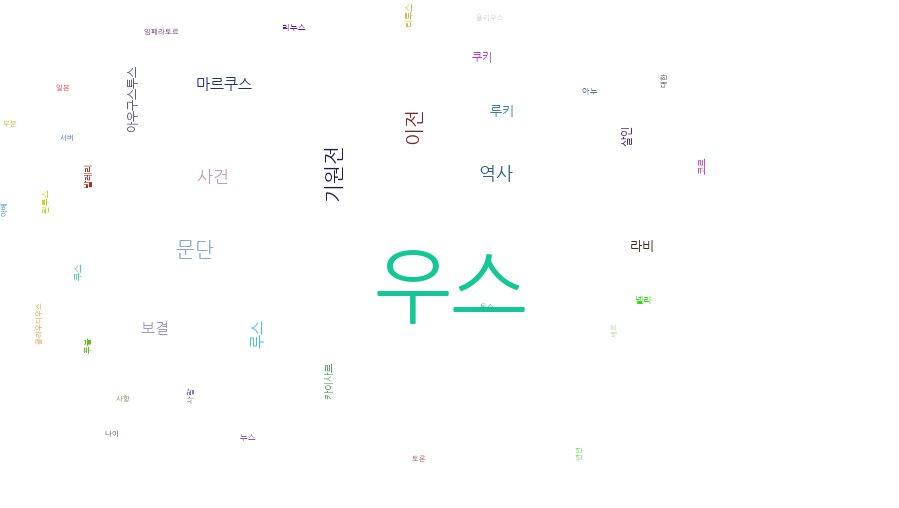

In [9]:
#생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename = 'wordcloud.jpg')

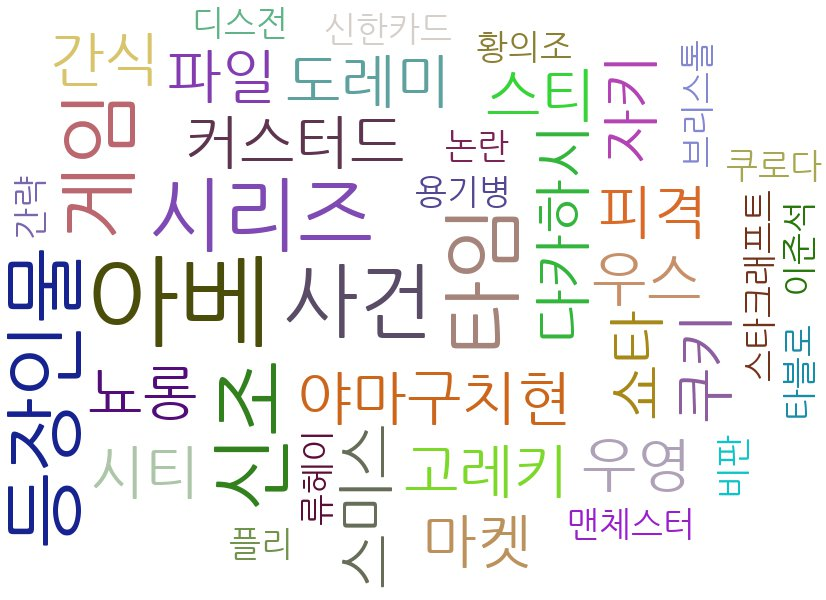

In [10]:
'''제목 키워드'''
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

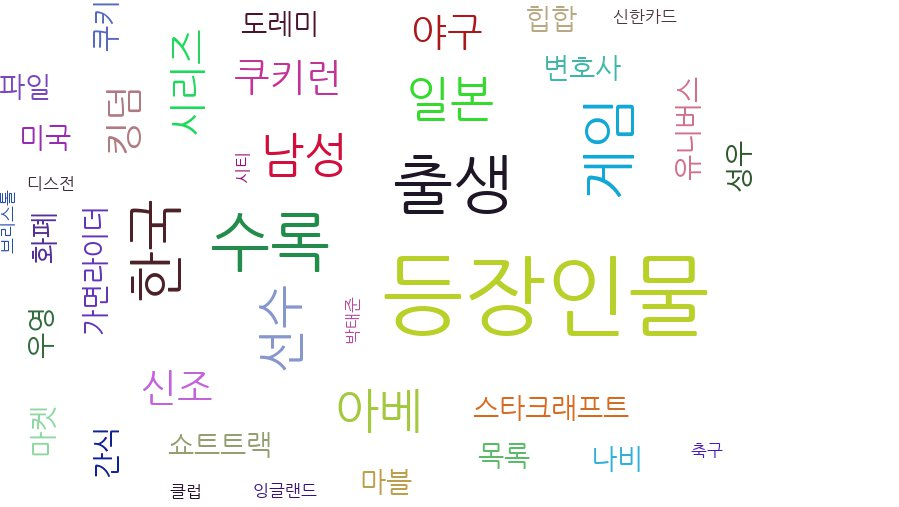

In [11]:
'''카테고리 키워드'''

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='category_wordcloud.jpg')